<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Lections/L01_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы машинного обучения
### Лекция 1

#### Введение в машинное обучение. Машинное обучение в биологии. Виды и примеры задач, громкие успехи ML в биологических науках.

## Зачем нужно машинное обучение?

С момента появления вычислительных устройств и развития теории алгоритмов, человека волновал один вопрос...

Существуют задачи, простые для компьютера, но сложные для человека.

Какие примеры вы можете привести?

1. Шахматы!

   *Да, не сразу, но компьютер смог победить человека в шахматы просто за счет перебора вариантов.*

   ![chess_kasparov.jpg](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/intro_chess_kasparov.jpg)

2. Нахождение оптимального пути

   ![optimal_path.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/intro_optimal_path.png)



3. Нахождение локального минимума функции

   ![local_minimum.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/intro_local_minimum.png)


Во всяком случае, человеку достаточно **один раз** описать компьютеру, как именно решать ту или иную задачу - и компьютер сможет делать это легко.


И в то же время есть задачи, с которыми компьютеру справиться очень сложно - и непонятно, как их ему описать

1. Распознавание котиков

   ![kitten.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/intro_kitten.png)

2. Перевод текста

   ![chinese.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/intro_chinese.png)


3. Распознавание речи

   ![goblin.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/intro_goblin.png)

При этом с этими же задачами человек справляется достаточно легко.

**Машинное обучение** - на данный момент результат наиболее успешных попыток решения этих проблем.

## Определение ML

Вместо того, чтобы тщательно описывать программу, решающую ту или иную задачу, напишем программу, которая **сама научится на данных из окружающего мира** (которые мы, возможно, предобработаем) выводить нужные нам закономерности и делать прогнозы.





Кроме того, мы будем оценивать качество того, как программа научилась, при помощи специальной функции - метрики качества - и сообщать программе, хорошо она выучилась или нет.

Говорят, что программа **P** *обучается* решать некоторую задачу **T**, если по мере накопления опыта **E** улучшается метрика оценки качества выполнения этой задачи **M**.

Звучит не очень понятно, поэтому **лучше смотреть сразу на примере**:

#### Пример ML-задачи

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Библиотека sklearn чтобы заниматься классическим машинным обучением
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
brca = load_breast_cancer()
print(brca.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
X = pd.DataFrame(columns=brca.feature_names, data=brca.data)
y = brca.target

Как правило, каждый из объектов задается набором признаков:

$f_j: X\rightarrow D_j, j=1,\ldots,n$.

Признаки могут быть разные по природе:
1. Бинарные $D_j=\{0,1\}$;
2. Номинальные (категории) $|D_j| < \infty$;
3. Порядковые (ранги) $|D_j| < \infty$, где $D_j$ упорядочены;
4. Количественные $D_j = \mathcal{R}$.

Объект - вектор из признаков. В машинном обучении принято, чтобы объекты были в строках, а признаки - в столбцах.

Посмотрим на описание объектов в данном примере.

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Посмотрим на переменную, которую мы хотим **научиться предсказывать**:

In [ ]:
print(brca.target_names)
print(y)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

**Мы говорили, что программа должна лучше выполнять задачу в рамках некоторой метрике по мере накопления опыта, верно?**

Посмотрим на это.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

clf = LogisticRegression(random_state=1) # модель логистической регрессии

shape = range(10, X_train.shape[0], 5)
eval_res = pd.DataFrame(index=shape, columns=['Train set size',
                                              'Test AUC-ROC'])
eval_res['Train set size'] = list(shape)

for i in shape:
    clf.fit(X_train[:i], y_train[:i])
    y_pred = clf.predict_proba(X_test)[:, 1]
    test_score = roc_auc_score(y_true=y_test,
                               y_score=y_pred)
    eval_res.at[i, 'Test AUC-ROC'] = test_score

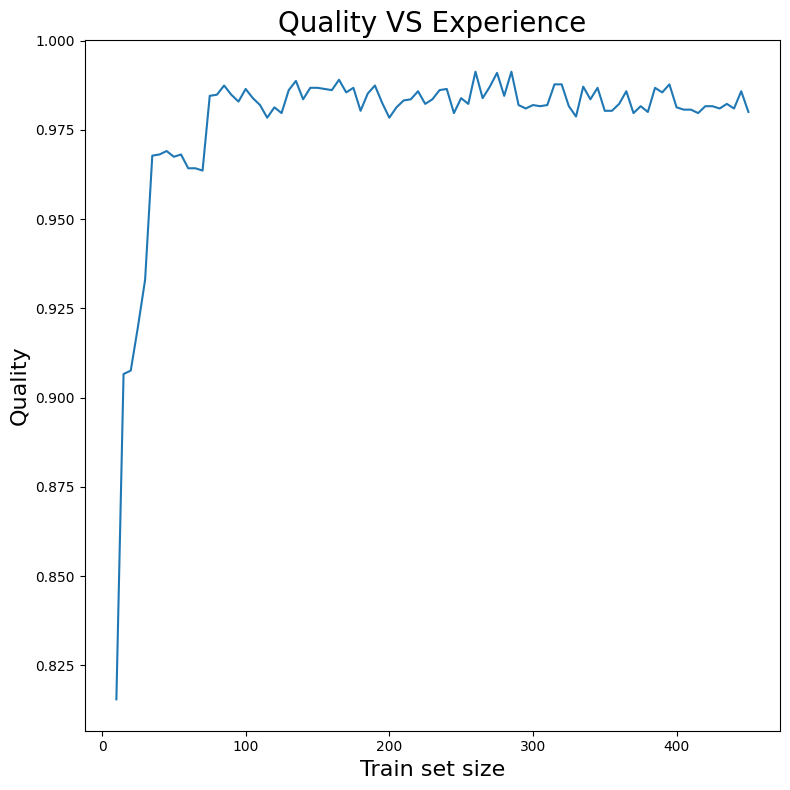

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Quality VS Experience', fontsize=20)
plt.ylabel('Quality', fontsize=16)
plt.xlabel('Train set size', fontsize=16)
plt.plot(eval_res['Train set size'], eval_res['Test AUC-ROC']);
plt.tight_layout()
plt.show()

Итак, у нас некоторый алгоритм предсказывал, является ли новообразование злокачественным или доброкачественным (**задача**), причём делал это лучше с точки зрения **метрики** AUC ROC по мере увеличения размера обучающей выборки (**опыта**).

Очевидно, мы хотим применять такой классный подход и в науке. В частности - в биологии.

Ведь в идеале получится, что мы просто даем методу данные, он придумывает решение, а мы им пользуемся

## Некоторые серьёзные успехи ML в биологии

### AlphaFold2

Командой DeepMind с очень высоким качеством была решена задача определения **третичной структуры** последовательности **по первичной структуре** (последовательности аминокислот).

![alphafold2_architecture.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/alphafold2_architecture.png)

![alphafold2_examples.gif](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/alphafold2_examples.gif)

Source: https://deepmind.com/blog/article/alphafold-a-solution-to-a-50-year-old-grand-challenge-in-biology

https://doi.org/10.1038/s41586-021-03819-2

Но иногда бывает и такое...

![alphafold2_failure.jpeg](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/alphafold2_failure.jpeg)

К чести AlphaFold2, степень уверенности модели в петлях низкая. Да и бывают в действительности сильно неструктурированные белки.

### Отбор/генерация молекул - кандидатов в лекарства

ML может использоваться для генерации лекарств и их repurposing.

В этой работе использовалиь графовые нейросети и различные эмбеддинги структур малых молекул.

Вещество **халицин** изначально использовалось для лечения диабета, но с помощью модели было обнаружено, что оно может обладать **бактерицидным действием**.

![antibiotic_discovery.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_antibiotic_discovery.png)

Source: https://doi.org/10.1016/j.cell.2020.01.021

### Генерация белков с заданными свойствами

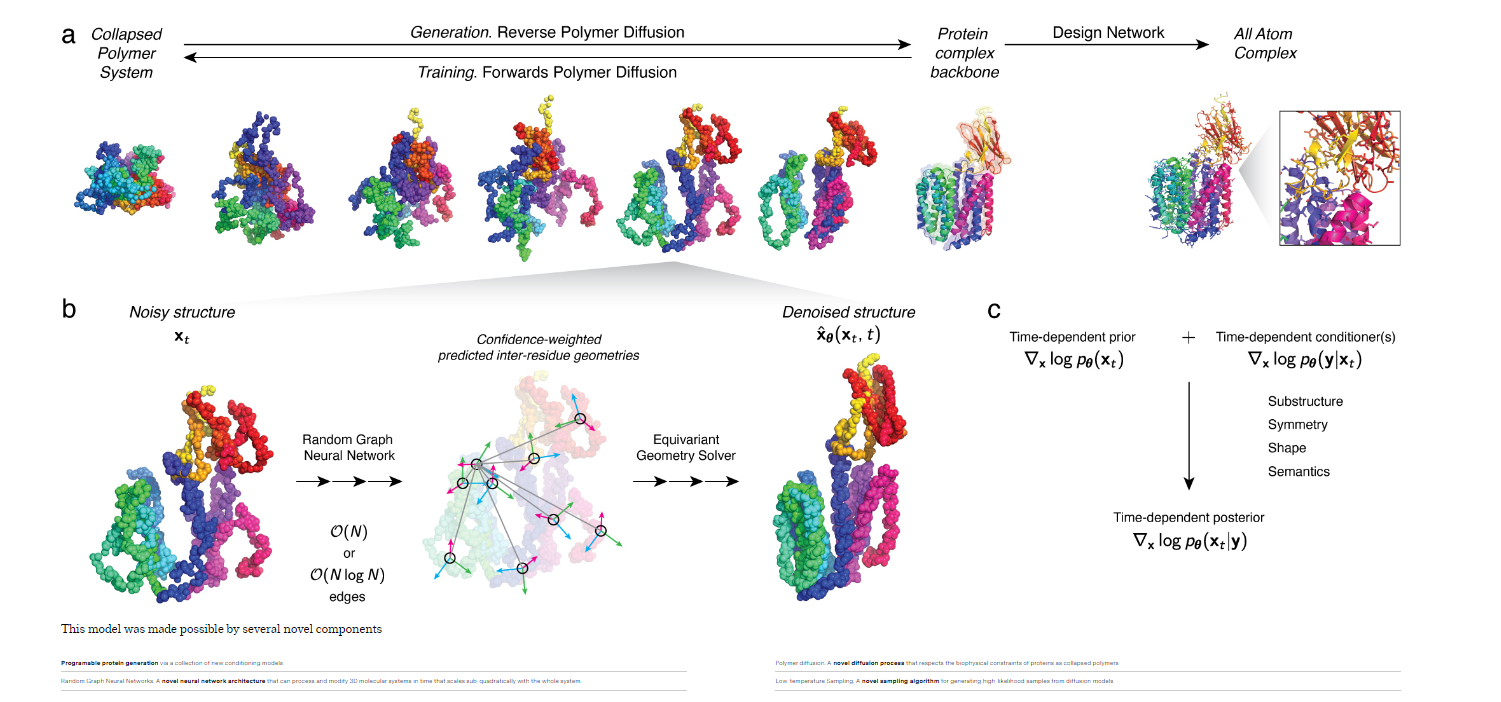

https://generatebiomedicines.com/chroma

### Обработка биологических текстов

![article_biobert.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_biobert.png)

Source: https://doi.org/10.1093/bioinformatics/btz682

### SNP calling

![snp_calling.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_snp_calling.png)

Source: [https://doi.org/10.1038/nbt.4235](https://doi.org/10.1038/nbt.4235)

### Ускорение super-resolution микроскопии

Существуют методы получения микрофотографий очень высокого разрешения. Это часто нужно для исследования различных клточных процессов, как везикулярный транспорт и т.п.

В Институте Пастера разработали архитектуру модели, позволяющую получить такую микрофотографию за значительно меньшее время.

![article_annapalm.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_annapalm.png)

Source: https://doi.org/10.1038/nbt.4106

### Предсказание доступности хроматина и других геномных меток по последовательности



![genomic_markup.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_genomic_markup.png)

Source: [https://doi.org/10.1038/s41592-021-01252-x](https://doi.org/10.1038/s41592-021-01252-x)

## Поехали?

Итак, мы поняли, что машинное обучение - это классно.

Мы поняли, что люди его делают и даже выше был написан какой-то код, который работает и без нашего глубокого понимания того, что он делает

Создаем какой-то черный ящик. Нам неважно, он решит нашу задачу - и хорошо :)

In [ ]:
clf = LogisticRegression(random_state=1)

Учим этот ящик. Очень часто черные ящики учатся при помощи метода `.fit`

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=1)

Предсказываем на том, что нам интересно

In [ ]:
clf.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0])

![fit-predict](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/meme_fit-predict.jpg)

Есть нюанс.

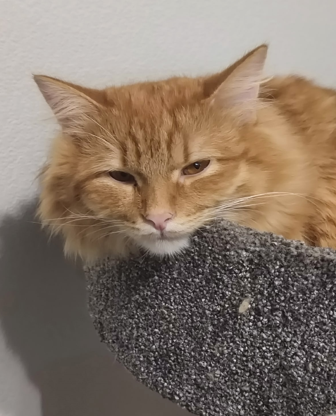

Это кот, и его зовут Нюанс.

Но мы немного о другом

## Нюансы ML

#### ML - это огромный процесс с кучей итераций

![data_lifecycle.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/data_lifecycle.png)

#### ML - это умение работать со своими данными и разгребать Авгиевы конюшни

Этапы получения и препроцессинга данных невероятно важны!

Данные могут быть:

* неточными - погрешности измерения, в биологии регулярно;
* разнородными - указаны в разных шкалах или единицах измерения;
* неполными - есть пропуски в данных, для некоторых объектов не указано(ы) значение(я);
* противоречивыми - разные ответы для одинаковых объектов;
* избыточными - слишком много объектов - вычислительно трудно их обрабатывать, слишком много признаков - много шума;
* недостаточными - объектов мало, признаков много (GWAS);
* неструктурированными - нет признаковых описаний (в случае картинок, аудио, видео, текстов и пр. - DL в помощь);
* поврежденными, недостоверными, шумными, ...

In [ ]:
%%shell
wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/data/stackoverflow_survey_results_public_head.csv.gz
gunzip stackoverflow_survey_results_public_head.csv.gz

--2024-11-05 14:11:22--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/data/stackoverflow_survey_results_public_head.csv.gz
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152662 (149K) [application/x-gzip]
Saving to: ‘stackoverflow_survey_results_public_head.csv.gz’

stackoverflow_surve 100%[===================>] 149.08K   598KB/s    in 0.2s    

2024-11-05 14:11:23 (598 KB/s) - ‘stackoverflow_survey_results_public_head.csv.gz’ saved [152662/152662]



In [ ]:
survey = pd.read_csv('stackoverflow_survey_results_public_head.csv')

In [ ]:
survey.head(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


#### ML - это про статистику



1. Во основе многих моделей лежат базовые концепты из теории вероятности и статистики


2. Одна модель может быть лучше другой по случайной причине - и мы **должны уметь это учитывать**.






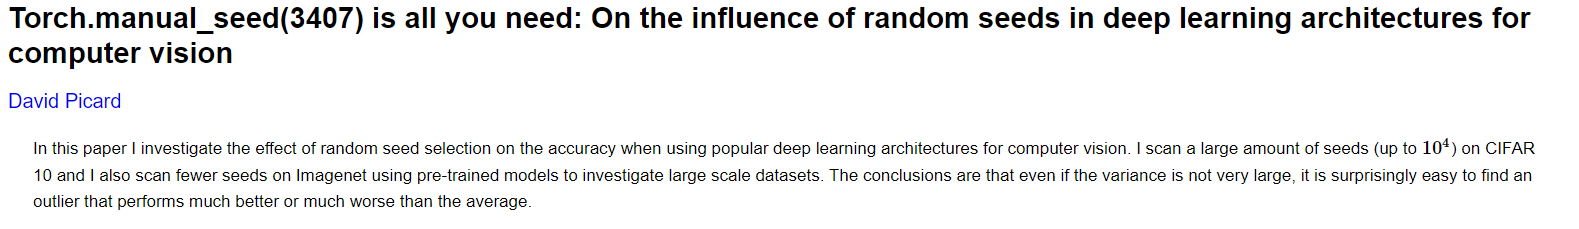

Source: [https://arxiv.org/abs/2109.08203](https://arxiv.org/abs/2109.08203)

3. Модель может не подходить под природу наших данных - и мы должны это уметь проверять

4. Переобучение модели, как правильно валидировать модель и многое другое - все это опирается на статистику.

#### ML - это domain knowledge

Для любого проекта важно понимать, что именно представляют собой ваши данные, каким образом они были получены и какие подходы работы с ними (возможно, не основанные на машинном обучении) уже существуют и т.д.

Совет от главы DeepMind и руководителя проекта AlphaFold2

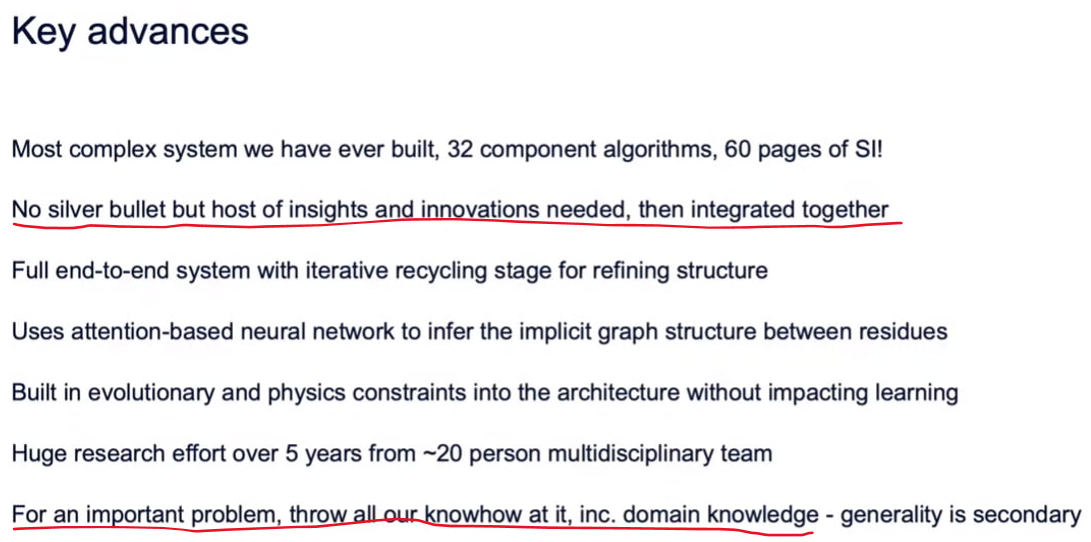

В противном случае может получиться вот так:


![covid_useless_models.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_covid_useless_models.png)

Source: [https://www.nature.com/articles/s42256-021-00307-0](https://www.nature.com/articles/s42256-021-00307-0)

Можно сказать проще:

![tennis_balls.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/meme_tennis_balls.png)

Source: [https://twitter.com/jessenleon/status/1230034908506214406](https://twitter.com/jessenleon/status/1230034908506214406)

#### ML - это умение понять, что у нас за задача и применить к ней правильную модель, обучив ее правильным образом



Потому придется разбираться.

## Виды задач машинного обучения

* **Supervised learning** (обучение на размеченных данных / обучение по прецедентам / обучение "с учителем")
* **Unsupervised learning** (обучение на неразмеченных данных / обучение "без учителя")
* *Semi-supervised learning* (обучение на частично размеченных данных)
* *Reinforcement learning* (обучение с подкреплением)
* *Self-supervised learning* ("самообучение")
* *Object generation* (генерация новых объектов с заданными свойствами)
* *Explainable AI* - делаем упор на том, чтобы модель могла объяснять свои предсказания
* *...* - при большом желании можно придумать еще виды. Все, разумеется, будет пересекаться и часто при большом желании сводиться друг к другу


### Обучение на размеченных данных (supervised learning)

Пусть $X$ - признаковое пространство объектов, а $Y$ - множество допустимых значений целевой переменной.

Пусть у нас есть  *обучающая выборка* $\{x_1, \ldots, x_l\}\subset X$

При этом для каждого $x_i$ нам известен ответ $y_i=y(x_i)$

Хотим найти функцию  $ \tilde{y}$ приближающую $y$ на всем множестве $X$.



#### Классификация

* $Y=\{0, 1\}$ - бинарная классификация;
* $Y=\{1,\ldots,M\}$ - множественная классификация на $M$ непересекающихся классов;
* $Y=\{0,1\}^M$ - множественная классификация на $M$ классов, которые могут пересекаться.

В нашем самом первом примере мы решали как раз задачу бинарной классификации.

Околобиологические/биомедицинские примеры множественной классификации:

**Предсказание по фотографии участка кожи, является ли образование на ней нормой, доброкачественной неоплазией или злокачественной неоплазией**

![skin_lesions_dl.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_skin_lesions_dl.png)

Source: https://doi.org/10.1038/nature21056

**Предсказание по фотографии гистологического среза, нормальное ли это лёгкое, LUAD или LUSC, а также статус некоторых часто мутирующих в раках лёгкого генов**

![luad_lusc_normal.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_luad_lusc_normal.png)


Source: https://doi.org/10.1038/s41591-018-0177-5


**Предсказание эффекта мутации на сплайсинг**






![splice_ai.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_splice_ai.png)

Source: [https://doi.org/10.1016/j.cell.2018.12.015](https://doi.org/10.1016/j.cell.2018.12.015)

 **Basecalling**

![basecalling_ont.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_basecalling_ont.png)

Source: https://doi.org/10.1101/2020.02.25.956771


#### Регрессия

То же самое, что в случае классификации, но теперь предсказываемая величина - непрерывна

**Предсказание энтальпии диссоциации**

![bond_dissociation_enthalpy.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_bond_dissociation_enthalpy.png)

Source: https://doi.org/10.1038/s41467-020-16201-z

**Предсказание энергии квантомеханической системы**

<img src="https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_quant_energy.jpg" width="500px">

**Предсказание экспрессии по данным о доступности хроматина**

![pred_expression_chromatic_acc.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/pred_expression_chromatic_acc.png)

Source: [https://www.kaggle.com/competitions/open-problems-multimodal](https://www.kaggle.com/competitions/open-problems-multimodal)

**Предсказание биологического возраста**

![pred_age.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/pred_age.png)

Предсказание констант полуингибирования фермента для веществ, констант диссоциации для комплексов, уровня экпрессии гена и прочее, и прочее...

### Обучение на неразмеченных данных

Простым языком задача формулируется следующим образом:

"Найти структуру в данных, если она в них присутствует".

С точки зрения статистики мы пытаемся различными способами оценить распределение $p(x)$, порождающее данные.

#### Кластеризация

Наиболее часто в этом виде машинного обучения встречается задача кластеризации:

Пусть $X$ - признаковое пространство объектов, дана $\{x_1, \ldots, x_l\}\subset X$ - выборка и определена функция расстояний между объектами $\rho: X\times X\rightarrow[0,\infty)$.

**Хотим найти:**

* $Y$ - множество кластеров;
* $a: X\rightarrow Y$ - алгоритм кластеризации такой, что в результате его работы выполняется:
  * объекты внутри одного кластера похожи;   
  * объекты разных кластеров различны.

Филогенетическая реконструкция - это кластеризация.

![sars2_tree.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_sars2_tree.png)


Source: https://doi.org/10.1038/s41598-020-79484-8

Исходя из числа мутантных и референсных ридов, картированных на позиции с мутациями, оценить структуру клеточных популяций опухоли.

![sciclone.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_sciclone.png)

Source: https://doi.org/10.1371/journal.pcbi.1003665


#### Снижение размерности

Задача снижения размерности заключается в нахождении оптимальной проекции объектов в пространство более низкой размерности. Нужна как для удобства визуализации многомерных данных, так и для получения более компактного их представления для других задач.

![scrna.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_scrna.png)

Source: https://doi.org/10.1038/nbt.4314


#### Детекция аномалий

Эта задача определения выбросов или "новых" данных, т.е., возможно, порождённых другим распределением, объекты из которого не присутствовали в выборке.

![anomaly_ts.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/anomaly_ts_small.png)




Но это не обязательно временной ряд.

![cancer_anomaly.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_cancer_anomaly.png)

Source: https://doi.org/10.3389/fgene.2019.00599


#### Выучивание хорошего представления данных (representation learning)

Часто именно эту область заносят в self-supervised learning.

**Выучим представление белков в целом**

![representation_learning_1.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/representation_learning_1.png)

**Чтобы потом лучше классифицировать пептиды, используя выученное представление**

![representation_learning_2.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/representation_learning_2.png)

Source: [https://doi.org/10.1038/s41587-021-01156-3](https://doi.org/10.1038/s41587-021-01156-3)

Кстати, **AlphaFold2** тоже содержит self-supervised часть :^)

### Задача генерации

Немного отдельно стоит задача генерации новых объектов на основании уже увиденных.

**Генерация последовательностей**

![evol_bvae.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_evol_bvae.png)


Source: https://doi.org/10.1101/2020.12.21.423785

C помощью автоэнкодера научились генерить "хорошие последовательности", которые эволюцией не отбраковываются. Используя это, мы можем понять, насколько наша последовательность приспособлена ("fit"), и указать, какие мутации являются для нее вредными.


 **Hi-C super resolution**

Научимся по данным Hi-C низкого разрешения генерировать данные высокого разрешения.

![hic_super-resolution.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_hic_super-resolution.png)

Source: [https://doi.org/10.1038/s41467-018-03113-2](https://doi.org/10.1038/s41467-018-03113-2)

**Генерация лекарств**

Учимся генерировать лекарства, которые будут производить заданные изменения в экспрессии

![drug_gan.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_drug_gan.png)

Source: [https://doi.org/10.3389/fphar.2020.00269](https://doi.org/10.3389/fphar.2020.00269)

### Ещё некоторые важные задачи в биологии

##### **Missing data imputation для single-cell**


![singlecell_imputation.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_singlecell_imputation.png)

Source: https://doi.org/10.1038/s41467-018-03405-7


##### **Предсказание структуры РНК**

![rna_structure_prediction.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/img/article_rna_structure_prediction.png)

Source: [https://www.science.org/doi/10.1126/science.abe5650](https://www.science.org/doi/10.1126/science.abe5650)